In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
    * Null hypothesis $H_0$: there is no correlation between river-bounded-ness vs median value. 

 - Perform Levene test on 'CHAS' and 'MEDV'. The null hypothesis is that they have equal variance. 

In [6]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center='mean')


LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

pvalue of Levene test is less than 0.05 => reject the null hypothesis of leven test (i.e. variance is equal) => so they have different variance

In [7]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'], equal_var = False)

TtestResult(statistic=54.9210289745203, pvalue=2.752650575837329e-215, df=505.7703107780583)

pvalue of T-test is less than 0.05, so we can reject the null hypothesis (i.e. there is no correlation between the two) hence there is significant correlation.

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    * Age groups: less or equal to 35 years, greater than 35 but less than 70 years, greater or equal to 70 years
    * Null hypothesis $H_0$: there is no difference between MDEV vs. age groups

In [8]:
boston_df['AGE_GROUP'] = '35<age<70' 
boston_df.loc[boston_df.AGE<=35, 'AGE_GROUP'] = 'age<=35'
boston_df.loc[boston_df.AGE>=70, 'AGE_GROUP'] = 'age>=70'

In [9]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35<age<70']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'age<=35']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == 'age>=70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

pvalue of Levene test is > 0.05, i.e. cannot reject null hypothesis of Levene test => variance is equal

In [10]:
f_statistic, p_value = scipy.stats.f_oneway(
                boston_df[boston_df['AGE_GROUP'] == '35<age<70']['MEDV'],
                boston_df[boston_df['AGE_GROUP'] == 'age<=35']['MEDV'], 
                boston_df[boston_df['AGE_GROUP'] == 'age>=70']['MEDV'], )
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


pvalue of ANOVA test is less than 0.05, so we can reject the null hypothesis (i.e. there is no difference between AGE_GROUP vs median value) => there is significant difference between the two variables

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

No, since the pvalue is very small, we can reject the null hypothesis (that is, there is no correlation between the two). In fact there is a very strong positive correlation

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

LinregressResult(slope=1.0916130158411093, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683098, intercept_stderr=0.817388708502475)

<Axes: xlabel='DIS', ylabel='MEDV'>

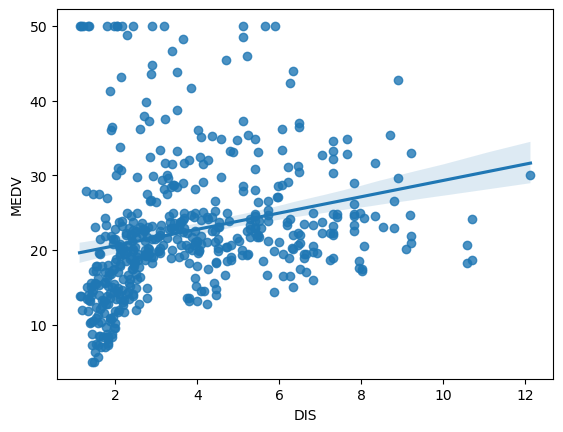

In [15]:
sns.regplot(data = boston_df, x='DIS', y='MEDV')

There is a slight positive correlation: each additional unit in weighted average distance to the employment centers will cause $1.09K increase in median value